In [2]:
!pip install keras-cv --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 634.9/634.9 kB 15.5 MB/s eta 0:00:00


# preprocessing pipeline:

In [3]:
import keras_cv
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds

augmenter = keras.Sequential(
  layers=[
      keras_cv.layers.RandomFlip(),
      keras_cv.layers.RandAugment(value_range=(0, 255)),
      keras_cv.layers.CutMix(),
      keras_cv.layers.MixUp()
    ]
)

def augment_data(images, labels):
  labels = tf.one_hot(labels, 3)
  inputs = {"images": images, "labels": labels}
  outputs = augmenter(inputs)
  return outputs['images'], outputs['labels']

You do not have Waymo Open Dataset installed, so KerasCV Waymo metrics are not available.


# Load dataset and augment

In [4]:
dataset = tfds.load('rock_paper_scissors', as_supervised=True, split='train')
dataset = dataset.batch(64)
dataset = dataset.map(augment_data, num_parallel_calls=tf.data.AUTOTUNE)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incomplete4TLVKT/rock_paper_scissors-train.tfrec…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incomplete4TLVKT/rock_paper_scissors-test.tfreco…

Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


# Model

In [5]:
densenet = keras_cv.models.DenseNet121(
  include_rescaling=True,
  include_top=True,
  classes=3
)
densenet.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
densenet.fit(dataset)

# Generate an image based on text using kerascv

In [4]:
from PIL import Image

from keras_cv.models import StableDiffusion

model = StableDiffusion(img_height=512, img_width=512, jit_compile=True)
img = model.text_to_image(
    "Photograph of a cute baby smiling"
)
Image.fromarray(img[0]).save("/content/horse.png")
print("Saved at horse.png")

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE
50/50 [==============================] - 2407s 46s/step
Saved at horse.png


In [ ]:
from IPython.display import Image


Image(filename='/content/horse.png')

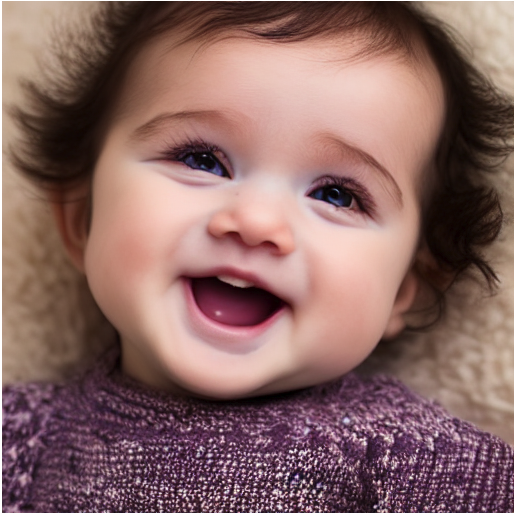